In [1]:
import itertools

import numpy as np
from qutip import *
# some_file.py
from mpl_toolkits.mplot3d import Axes3D

from qudit import *
# import scipy
import time
import IPython.display as disp
from tqdm.notebook import tqdm
import multiprocess as mp
import matplotlib.pyplot as plt
from discrete_simulation import *

%load_ext autoreload
%autoreload 2

In [16]:
d = 16
m_i = 16
m_c = 16
fidelity_cut = 0
gamma_list = np.logspace(-3,-1,20)


simulation16 = DiscreteSimulation(d, m_i,m_c )

with mp.Pool(mp.cpu_count()) as pool:
    fid_prob_list = pool.starmap(simulation16.average_fidelity, zip(list(gamma_list),list(10*gamma_list), [fidelity_cut] * len(gamma_list)))
fid_list = [tup[0] for tup in fid_prob_list]
prob_list = [tup[1] for tup in fid_prob_list]

print(1)

m_i = 16
m_c = 8
simulation8 = DiscreteSimulation(d, m_i,m_c)

with mp.Pool(mp.cpu_count()) as pool:
    fid_prob_list = pool.starmap(simulation8.average_fidelity, zip(list(gamma_list),list(10*gamma_list), [fidelity_cut] * len(gamma_list)))
fid_list_168 = [tup[0] for tup in fid_prob_list]
prob_list_168 = [tup[1] for tup in fid_prob_list]

print(2)

m_i = 8
m_c = 8
simulation88 = DiscreteSimulation(d, m_i,m_c)

with mp.Pool(mp.cpu_count()) as pool:
    fid_prob_list = pool.starmap(simulation8.average_fidelity, zip(list(gamma_list),list(10*gamma_list), [fidelity_cut] * len(gamma_list)))
fid_list_88 = [tup[0] for tup in fid_prob_list]
prob_list_88 = [tup[1] for tup in fid_prob_list]

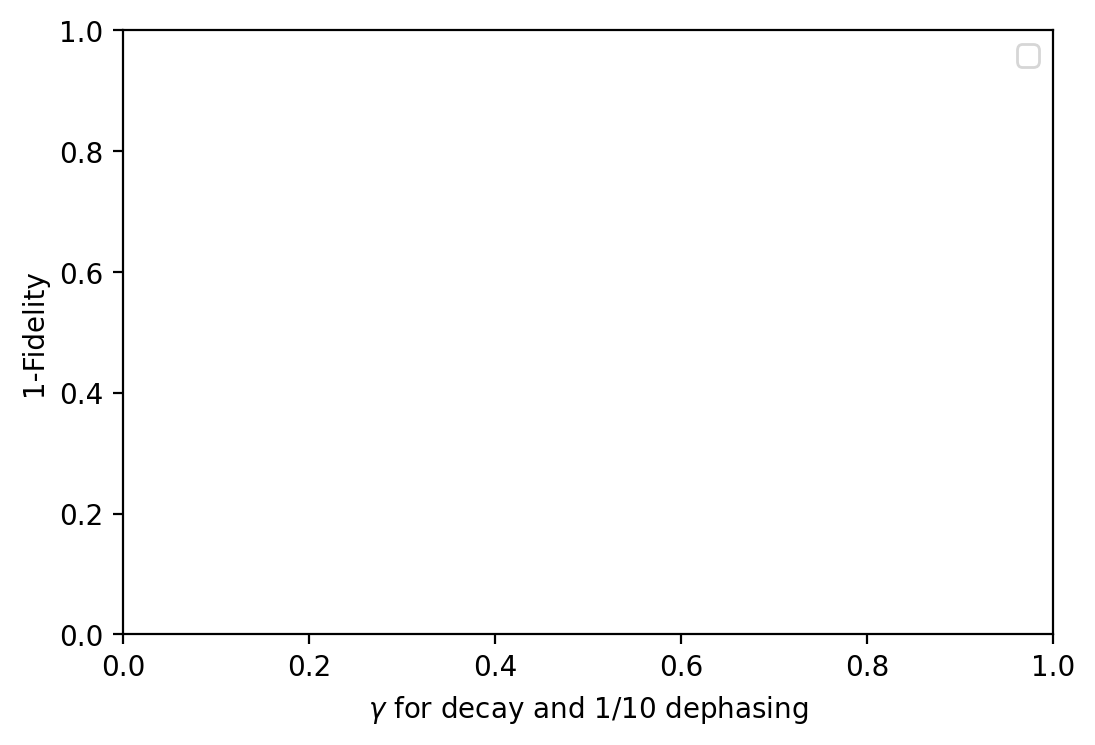

In [3]:
plt.figure(dpi=200)

plt.loglog(gamma_list,1-np.array(fid_list), 'b.-')
plt.loglog(gamma_list,1-np.array(fid_list_168), 'r.--')
# plt.loglog(gamma_list,1-np.array(fid_list_filtered), 'r.-')
# plt.loglog(gamma_list,np.array(fail_prob_list), 'g.--')

# plt.title("Infidelity with trivial protocol and with our protocol. d = 16, m_i = 4, m_c=4")
plt.xlabel("$\gamma$ for decay and 1/10 dephasing")
plt.ylabel("1-Fidelity")
plt.legend(["m_i=m_c=16","m_i=16,m_c=8"])

In [22]:
a = zip(list(gamma_list),list(gamma_list), [fidelity_cut] * len(gamma_list))

In [26]:
a.__next__()

(0.03162277660168379, 0.03162277660168379, 0.999)

In [15]:
d = 32
qudit4 = EntangledQudit(d,d)
m_i = 16
m_c = 4
A_1, B_1 = 0, 4
A_2, B_2 = 1, 1
qudit4.fidelity_specific(gamma_loss_A=1e-2,gamma_dephasing_A=1e-2, A_1=A_1,B_1=B_1,A_2=A_2,B_2=B_2,m_i=m_i,m_c=m_c)

KeyboardInterrupt: 

In [5]:
1-fid_list[0][0]

6.656897255652439e-13

In [7]:
fid_list2

[0.9999999999993343, 0, 0, 0]

In [ ]:


# Create some sample data
x = np.logspace(0, 2, 100)
y = np.logspace(0, 2, 100)
x, y = np.meshgrid(x, y)
z = x ** 2 + y ** 2

# Create a figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface using log scale for all three axes
ax.plot_surface(np.log10(x), np.log10(y), np.log10(z))

# Set log scale for all axes
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_zscale('log')

# Set axis labels
ax.set_xlabel('Log X')
ax.set_ylabel('Log Y')
ax.set_zlabel('Log Z')

# Show the plot
plt.show()